In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests as re
from dateutil.parser import parse

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [2]:
coffee_data = pd.read_csv("data/merged_data_cleaned.csv")

In [3]:
coffee_data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [4]:
coffee_data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [5]:
coffee_data.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [6]:
coffee_data["Altitude"].unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

In [7]:
coffee_data.Altitude.unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

In [8]:
coffee_data.Flavor

0       8.83
1       8.67
2       8.50
3       8.58
4       8.50
        ... 
1334    7.58
1335    7.67
1336    7.33
1337    6.83
1338    6.67
Name: Flavor, Length: 1339, dtype: float64

In [9]:
coffee_data.Acidity

0       8.75
1       8.58
2       8.42
3       8.42
4       8.50
        ... 
1334    7.58
1335    7.75
1336    7.42
1337    7.17
1338    6.83
Name: Acidity, Length: 1339, dtype: float64

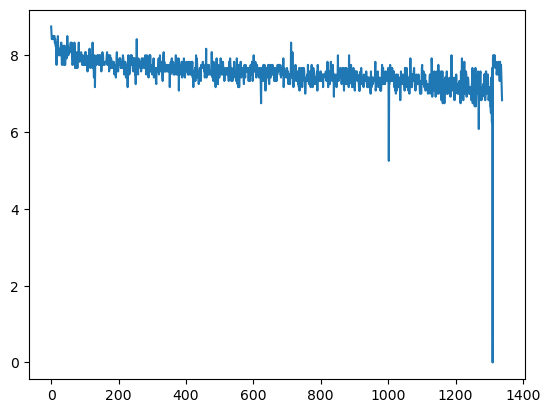

In [10]:
plt.plot(coffee_data.Acidity)

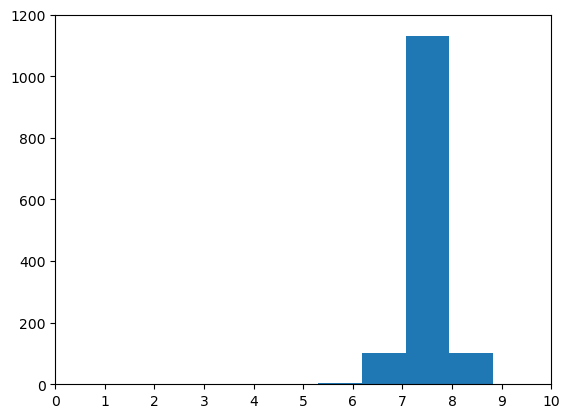

In [11]:
plt.hist(coffee_data.Flavor)
plt.xlim(0, 9)
plt.ylim(0, 1200)
plt.xticks(range(11))
plt.show()

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [12]:
coffee_data.columns = (coffee_data.columns
                        .str.lower()
                        .str.replace('.', '_'))

In [13]:
coffee_data

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [14]:
coffee_data.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

### Let's save our dataset to have a backup

In [15]:
coffee_data_backup = coffee_data

In [16]:
coffee_data.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

In [17]:
coffee_data.bag_weight.describe()

count     1339
unique      56
top       1 kg
freq       331
Name: bag_weight, dtype: object

### Let's remove rows with 'kg,lbs', because these are unclear values.

In [18]:
coffee_data = coffee_data[~coffee_data.bag_weight.str.contains('kg,lbs')]

In [19]:
coffee_data.describe()

,unnamed: 0,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1336.000000,1337.000000,1107.000000,1107.000000,1107.000000
mean,669.933433,154.411369,7.565752,7.519648,7.400441,7.535138,7.516530,7.517105,9.834630,9.834862,9.856477,7.502446,82.083373,0.088482,0.480180,0.173653,3.561705,1751.527612,1799.707934,1775.617773
std,386.212988,129.950013,0.377002,0.398149,0.404425,0.379773,0.369264,0.408414,0.554969,0.764491,0.616538,0.473140,3.498966,0.048249,2.551524,0.832717,5.314732,8677.253311,8676.631894,8676.449068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,336.000000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,670.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1004.000000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [20]:
coffee_data.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '6', '3 lbs', '50 kg',
       '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg', '19200 kg',
       '5 lbs', '6 kg', '0 lbs', '46 kg', '40 kg', '20 kg', '34 kg',
       '1 lbs', '660 kg', '18975 kg', '12000 kg', '35 kg', '66 kg',
       '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg', '18000 kg',
       '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg', '1218 kg',
       '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg', '80 lbs', '8 kg',
       '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs', '100 kg', '130 lbs'],
      dtype=object)

### Now let's make 2 new columns - the_bag_weight and bag_weight_measurement.

In [21]:
coffee_data["the_bag_weight"] = coffee_data.bag_weight.str.slice(0,-3)

C:\Users\Owner\AppData\Local\Temp\ipykernel_19612\526304434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_data["the_bag_weight"] = coffee_data.bag_weight.str.slice(0,-3)


In [22]:
coffee_data.the_bag_weight.unique()

array(['60', '', '30', '69', '1', '3 ', '50', '2 ', '100 ', '15', '2',
       '70', '19200', '5 ', '6', '0 ', '46', '40', '20', '34', '1 ',
       '660', '18975', '12000', '35', '66', '80', '132 ', '5', '25', '59',
       '18000', '150 ', '9000', '18', '10', '29', '1218', '4 ', '0',
       '13800', '1500', '24', '80 ', '8', '3', '350', '67', '4', '55 ',
       '100', '130 '], dtype=object)

In [23]:
coffee_data["bag_weight_measurement"] = coffee_data.bag_weight.str.slice(-3)

C:\Users\Owner\AppData\Local\Temp\ipykernel_19612\662262542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_data["bag_weight_measurement"] = coffee_data.bag_weight.str.slice(-3)


In [24]:
coffee_data.bag_weight_measurement.unique()

array([' kg', '1', '6', 'lbs', '2'], dtype=object)

In [25]:
coffee_data.describe()

,unnamed: 0,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1336.000000,1337.000000,1107.000000,1107.000000,1107.000000
mean,669.933433,154.411369,7.565752,7.519648,7.400441,7.535138,7.516530,7.517105,9.834630,9.834862,9.856477,7.502446,82.083373,0.088482,0.480180,0.173653,3.561705,1751.527612,1799.707934,1775.617773
std,386.212988,129.950013,0.377002,0.398149,0.404425,0.379773,0.369264,0.408414,0.554969,0.764491,0.616538,0.473140,3.498966,0.048249,2.551524,0.832717,5.314732,8677.253311,8676.631894,8676.449068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,336.000000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,670.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1004.000000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


### We no longer need bag_weight column.

In [26]:
coffee_data = coffee_data.drop(columns=["bag_weight"])

In [27]:
coffee_data.columns

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'the_bag_weight', 'bag_weight_measurement'],
      dtype='object')

### Let's clear the_bag_weight of empty spaces

In [28]:
coffee_data.the_bag_weight = coffee_data.the_bag_weight.str.strip()

In [29]:
coffee_data.the_bag_weight.unique()

array(['60', '', '30', '69', '1', '3', '50', '2', '100', '15', '70',
       '19200', '5', '6', '0', '46', '40', '20', '34', '660', '18975',
       '12000', '35', '66', '80', '132', '25', '59', '18000', '150',
       '9000', '18', '10', '29', '1218', '4', '13800', '1500', '24', '8',
       '350', '67', '55', '130'], dtype=object)

In [30]:
coffee_data.describe()

,unnamed: 0,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1336.000000,1337.000000,1107.000000,1107.000000,1107.000000
mean,669.933433,154.411369,7.565752,7.519648,7.400441,7.535138,7.516530,7.517105,9.834630,9.834862,9.856477,7.502446,82.083373,0.088482,0.480180,0.173653,3.561705,1751.527612,1799.707934,1775.617773
std,386.212988,129.950013,0.377002,0.398149,0.404425,0.379773,0.369264,0.408414,0.554969,0.764491,0.616538,0.473140,3.498966,0.048249,2.551524,0.832717,5.314732,8677.253311,8676.631894,8676.449068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,336.000000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,670.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1004.000000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


### Let's clean rows with 1, 2, 6 because we don't know 1, 2, 6 kg or lbs is this

In [31]:
coffee_data.bag_weight_measurement.unique()

array([' kg', '1', '6', 'lbs', '2'], dtype=object)

In [32]:
coffee_data = coffee_data[~coffee_data.bag_weight_measurement.str.contains('1')]

In [33]:
coffee_data = coffee_data[~coffee_data.bag_weight_measurement.str.contains('2')]

In [34]:
coffee_data = coffee_data[~coffee_data.bag_weight_measurement.str.contains('6')]

In [35]:
coffee_data.describe()

,unnamed: 0,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1309.000000,1310.000000,1093.000000,1093.000000,1093.000000
mean,676.112977,153.745802,7.563603,7.514359,7.394420,7.527687,7.510641,7.510397,9.836069,9.833504,9.856069,7.494733,82.041809,0.089198,0.487023,0.177235,3.570229,1757.926465,1804.124247,1781.025356
std,383.340176,129.745559,0.375999,0.394780,0.402139,0.376480,0.367936,0.406274,0.557861,0.771519,0.621198,0.468198,3.499837,0.047821,2.576452,0.840890,5.339007,8732.394429,8731.796203,8731.611247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,346.250000,15.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,678.500000,168.500000,7.580000,7.540000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1006.750000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [36]:
coffee_data.bag_weight_measurement.unique()

array([' kg', 'lbs'], dtype=object)

In [37]:
coffee_data.shape

(1310, 45)

## Additionally we could convert lbs values to kg and round them to 2 digits

In [38]:
def convert_lbs_to_kg(lbs_value):
    return round((lbs_value * 0.45359237), 2)

In [39]:
coffee_data[coffee_data.bag_weight_measurement == 'lbs'].the_bag_weight.unique()

array(['3', '2', '100', '5', '0', '1', '132', '150', '4', '80', '55',
       '130'], dtype=object)

In [40]:
coffee_data.the_bag_weight.unique()

array(['60', '30', '69', '1', '3', '50', '2', '100', '15', '70', '19200',
       '5', '6', '0', '46', '40', '20', '34', '660', '18975', '12000',
       '35', '66', '80', '132', '25', '59', '18000', '150', '9000', '18',
       '10', '29', '1218', '4', '13800', '1500', '24', '8', '350', '67',
       '55', '130'], dtype=object)

In [41]:
coffee_data["the_bag_weight"] = coffee_data["the_bag_weight"].astype(float)

In [42]:
coffee_data.the_bag_weight = coffee_data.apply(
    lambda x: convert_lbs_to_kg(x["the_bag_weight"]) 
    if (x["bag_weight_measurement"] == 'lbs') 
    else x["the_bag_weight"], axis = 1)

In [43]:
coffee_data[coffee_data.bag_weight_measurement == 'lbs'].the_bag_weight.unique()

array([ 1.36,  0.91, 45.36,  2.27,  0.  ,  0.45, 59.87, 68.04,  1.81,
       36.29, 24.95, 58.97])

### And now we should replace all lbs values with kg in bag_weight_measurement

In [44]:
coffee_data.bag_weight_measurement.unique()

array([' kg', 'lbs'], dtype=object)

In [45]:
coffee_data.loc[
    coffee_data.bag_weight_measurement == "lbs", "bag_weight_measurement"
    ] = 'kg'

In [46]:
coffee_data.bag_weight_measurement.unique()

array([' kg', 'kg'], dtype=object)

### Let's clean space in kg

In [47]:
coffee_data.bag_weight_measurement = coffee_data.bag_weight_measurement.str.strip()

In [48]:
coffee_data.bag_weight_measurement.unique()

array(['kg'], dtype=object)

### Now we can rename the the_bag_weight column to the_bag_weight_in_kg and remove bag_weight_measurement column.

In [49]:
coffee_data.rename(columns={"the_bag_weight" : "the_bag_weight_in_kg"}, inplace=True)

In [50]:
coffee_data.columns

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'the_bag_weight_in_kg', 'bag_weight_measurement'],
      dtype='object')

In [51]:
coffee_data

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,the_bag_weight_in_kg,bag_weight_measurement
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.00,kg
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.00,kg
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0,60.00,kg
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.00,kg
5,5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN,30.00,kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,2.00,kg
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0,2.00,kg
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0,1.00,kg
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,2.27,kg


In [52]:
coffee_data = coffee_data.drop(columns=["bag_weight_measurement"])

In [53]:
coffee_data.columns

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'the_bag_weight_in_kg'],
      dtype='object')

In [54]:
coffee_data

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,the_bag_weight_in_kg
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.00
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.00
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0,60.00
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.00
5,5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,2.00
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0,2.00
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0,1.00
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,2.27


### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

### First we run unique() on the expiration and grading_date columns to find out what kind of data we have in them.

In [55]:
coffee_data.expiration.unique()

array(['April 3rd, 2016', 'March 25th, 2016', 'September 3rd, 2014',
       'September 17th, 2013', 'September 2nd, 2011', 'March 29th, 2016',
       'March 26th, 2016', 'March 12th, 2016', 'August 31st, 2011',
       'April 7th, 2017', 'March 24th, 2016', 'April 2nd, 2015',
       'July 26th, 2013', 'December 2nd, 2012', 'June 26th, 2015',
       'May 18th, 2018', 'May 18th, 2017', 'December 2nd, 2016',
       'May 30th, 2015', 'April 6th, 2013', 'January 28th, 2012',
       'April 12th, 2013', 'January 4th, 2012', 'June 9th, 2016',
       'January 29th, 2016', 'October 1st, 2015', 'March 20th, 2015',
       'February 6th, 2015', 'February 12th, 2013', 'May 16th, 2017',
       'June 30th, 2015', 'July 26th, 2014', 'October 9th, 2018',
       'July 3rd, 2013', 'June 5th, 2013', 'June 23rd, 2018',
       'January 22nd, 2015', 'October 25th, 2013', 'March 18th, 2014',
       'January 12th, 2014', 'May 22nd, 2016', 'March 30th, 2016',
       'February 26th, 2014', 'April 6th, 2017', 'May 

In [56]:
coffee_data.grading_date.unique()

array(['April 4th, 2015', 'March 26th, 2015', 'September 3rd, 2013',
       'September 17th, 2012', 'September 2nd, 2010', 'March 30th, 2015',
       'March 27th, 2015', 'March 13th, 2015', 'August 31st, 2010',
       'April 7th, 2016', 'March 25th, 2015', 'April 2nd, 2014',
       'July 26th, 2012', 'December 3rd, 2011', 'June 26th, 2014',
       'May 18th, 2017', 'May 18th, 2016', 'December 3rd, 2015',
       'May 30th, 2014', 'April 6th, 2012', 'January 28th, 2011',
       'April 12th, 2012', 'January 4th, 2011', 'June 10th, 2015',
       'January 29th, 2015', 'October 1st, 2014', 'March 20th, 2014',
       'February 6th, 2014', 'February 13th, 2012', 'May 16th, 2016',
       'June 30th, 2014', 'July 26th, 2013', 'October 9th, 2017',
       'July 3rd, 2012', 'June 5th, 2012', 'June 23rd, 2017',
       'January 22nd, 2014', 'October 25th, 2012', 'March 18th, 2013',
       'January 12th, 2013', 'May 23rd, 2015', 'March 31st, 2015',
       'February 26th, 2013', 'April 6th, 2016', 'May

In [57]:
# def string_to_date(date_string):
 #   return datetime.strptime(date_string, "%m-%d-%Y")

In [58]:
# from dateutil.parser import parse
# date = parse('June 21st, 2013')
# print(date)

### All our data in expiration and in grading_date columns are in format 'February 26th, 2013' - 'month_name ordered_date_number, year'. 
That's why we'll use library dateutil. The dateutil module in Python is a powerful utility for parsing and manipulating dates. When working with pandas, dateutil is automatically leveraged within the pd.to_datetime() function for parsing dates. Pandas uses the parser from the dateutil module, which can intelligently parse a wide variety of date formats.
### We define simple function which converts date_string into date.

In [59]:
def string_to_date(date_string):
    return parse(date_string)

### We'll apply our function on expiration and grading_date.

In [60]:
coffee_data.expiration = coffee_data.expiration.apply(string_to_date)
coffee_data.grading_date = coffee_data.grading_date.apply(string_to_date)

### Now we'll check the data in expiration and grading_date columns using unique().

In [61]:
coffee_data.expiration.unique()

<DatetimeArray>
['2016-04-03 00:00:00', '2016-03-25 00:00:00', '2014-09-03 00:00:00',
 '2013-09-17 00:00:00', '2011-09-02 00:00:00', '2016-03-29 00:00:00',
 '2016-03-26 00:00:00', '2016-03-12 00:00:00', '2011-08-31 00:00:00',
 '2017-04-07 00:00:00',
 ...
 '2013-01-04 00:00:00', '2018-10-31 00:00:00', '2015-07-14 00:00:00',
 '2018-10-25 00:00:00', '2017-08-17 00:00:00', '2015-08-05 00:00:00',
 '2017-08-23 00:00:00', '2015-05-19 00:00:00', '2014-06-20 00:00:00',
 '2015-12-23 00:00:00']
Length: 558, dtype: datetime64[ns]

In [62]:
coffee_data.grading_date.unique()

<DatetimeArray>
['2015-04-04 00:00:00', '2015-03-26 00:00:00', '2013-09-03 00:00:00',
 '2012-09-17 00:00:00', '2010-09-02 00:00:00', '2015-03-30 00:00:00',
 '2015-03-27 00:00:00', '2015-03-13 00:00:00', '2010-08-31 00:00:00',
 '2016-04-07 00:00:00',
 ...
 '2012-01-05 00:00:00', '2017-10-31 00:00:00', '2014-07-14 00:00:00',
 '2017-10-25 00:00:00', '2016-08-17 00:00:00', '2014-08-05 00:00:00',
 '2016-08-23 00:00:00', '2014-05-19 00:00:00', '2013-06-20 00:00:00',
 '2014-12-23 00:00:00']
Length: 558, dtype: datetime64[ns]

### Let's take a look on harvest_year column.

In [63]:
coffee_data.harvest_year.unique()

array(['2014', '2013', '2012', 'March 2010', '2015', '2011', '2016',
       '2015/2016', '2010', '2017', '2009/2010', '2010-2011', nan,
       '2009-2010', '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       '2014/2015', '2011/2012', 'January 2011', '4T/10', '2016 / 2017',
       '23 July 2010', '1T/2011', '4t/2010', '4T/2010', 'Mayo a Julio',
       '47/2010', 'Abril - Julio', '4t/2011', 'Abril - Julio /2011',
       'Spring 2011 in Colombia.', '3T/2011', '2016/2017', '1t/2011',
       '2018', '4T72010'], dtype=object)

### There are some dummy values like 'mmm', 'TEST", etc.
Valid values are '2014', '2013', '2012', '2015', '2011', '2016', '2017', '2018' - [2011; 2018]. Let's count how many rows we have with them.
We'll copy our data into new dataset coffee_data_backup_5. 

In [64]:
coffee_data_backup_5 = coffee_data

### We'll count our rows before this - 1269.

In [65]:
coffee_data_backup_5.harvest_year.count()

1269

In [66]:
coffee_data.harvest_year.unique()

array(['2014', '2013', '2012', 'March 2010', '2015', '2011', '2016',
       '2015/2016', '2010', '2017', '2009/2010', '2010-2011', nan,
       '2009-2010', '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       '2014/2015', '2011/2012', 'January 2011', '4T/10', '2016 / 2017',
       '23 July 2010', '1T/2011', '4t/2010', '4T/2010', 'Mayo a Julio',
       '47/2010', 'Abril - Julio', '4t/2011', 'Abril - Julio /2011',
       'Spring 2011 in Colombia.', '3T/2011', '2016/2017', '1t/2011',
       '2018', '4T72010'], dtype=object)

In [67]:
coffee_data.groupby("harvest_year").count()

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,the_bag_weight_in_kg
harvest_year,,,,,,,,,,,,,,,,,,,,,
1T/2011,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1t/2011,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2009-2010,2,2,2,2,0,0,0,2,0,0,...,2,2,2,2,2,2,0,0,0,2
2009/2010,4,4,4,4,4,0,2,4,0,2,...,4,4,4,4,4,4,2,2,2,4
2010,6,6,6,6,6,0,4,4,0,4,...,6,6,6,6,6,6,4,4,4,6
2010-2011,6,6,6,6,5,0,3,5,0,5,...,6,6,6,6,6,6,5,5,5,6
2011,26,26,26,26,21,0,6,20,14,21,...,26,26,26,26,26,26,21,21,21,26
2011/2012,2,2,2,2,2,0,2,2,2,1,...,2,2,2,2,2,2,1,1,1,2
2012,354,354,353,354,260,0,251,337,271,295,...,354,354,354,354,354,354,295,295,295,354


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

### We take the first backup of coffee_data

In [68]:
coffee_data = coffee_data_backup

### Next, we analyze the unique values

In [71]:
coffee_data.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

### There is a nan value. Let's check how many rows have nan.

In [70]:
coffee_data[coffee_data.country_of_origin.isna()]

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1197,1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,...,NaN,3,"February 29th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN


### Only 1 row has value nan for country_of_origin.

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!